f(x) = -12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x **2 + 10 * x - 30 


1. Определить корни

2. Найти интервалы, на которых функция возрастает

3. Найти интервалы, на которых функция убывает

4. Построить график

5. Вычислить вершину

6. Определить промежутки, на котором f > 0

7. Определить промежутки, на котором f < 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a, b, c, d, e = -12, -18, 5, 10, -30
limit = 10
step = 0.01
line_style = '-'
direct_up = True
color = 'b'

In [3]:
def switch_line():
  global line_style
  if line_style == '-':
    line_style = '--'
  else:
    line_style = '-'
  return line_style


In [4]:
def switch_color():
  global color
  if color == 'b':
      color = 'r'
  else:
    color = 'b'
  return color

In [5]:
def func(x):
  f= a * x ** 4 * np.sin(np.cos(x)) + b * x ** 3 + c * x **2 + d * x + e
  return f

In [6]:
x = np.arange(-limit, limit, step)


In [7]:
x_change = [(-limit, 'limit')]
for i in range(len(x)-1):
  if func(x[i]) > 0 and func(x[i+1]) < 0 or func(x[i]) < 0 and func(x[i+1]) > 0:
    x_acr = np.arange(x[i], x[i+1], 0.000001)
    for j in range(len(x_acr)-1):
      if func(x_acr[j]) > 0 and func(x_acr[j+1]) < 0 or func(x_acr[j]) < 0 and func(x_acr[j+1]) > 0:
        x_change.append((x_acr[j], 'zero'))
  if direct_up:
    if func(x[i]) > func(x[i+1]):
      direct_up = False
      x_change.append((x[i], 'dir'))
  else:
      if func(x[i]) < func(x[i+1]):
        direct_up = True
        x_change.append((x[i], 'dir'))

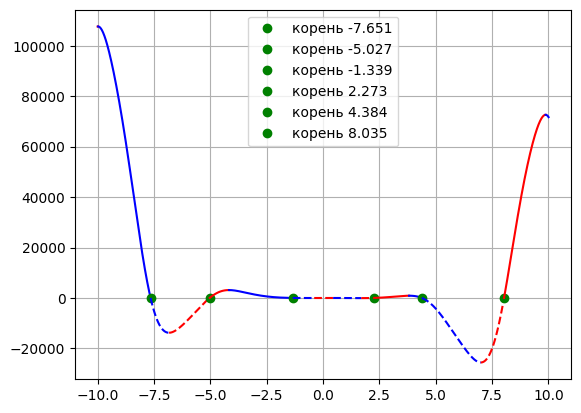

In [8]:
x_change.append((limit, 'limit'))
for i in range(len(x_change)-1):
  cur_x = np.arange(x_change[i][0], x_change[i+1][0]+step, step)
  if x_change[i][1] == 'zero':
    plt.plot(x_change[i][0], func(x_change[i][0]), 'go', label = f'корень {round(x_change[i][0], 3)}')
    plt.rcParams['lines.linestyle'] = switch_line()
    plt.plot(cur_x, func(cur_x), color)
  else:  
    plt.plot(cur_x, func(cur_x), switch_color())
plt.grid()
plt.legend()